# Modele pamięci

In [1]:
import numpy as np                         # numeric
import matplotlib.pyplot as plt            # plotting
import matplotlib as mpl                   # plotting
from IPython.display import display, Image # display imported graphics

In [2]:
import os.path 

isdir = os.path.isdir('lib_nn') # check whether 'lib_nn' exists

if not isdir:
   !git clone https://github.com/bronwojtek/lib_nn.git # cloning the library from github

import sys                     
sys.path.append('./lib_nn') 

from neural import *            # importing my library package

Invoking __init__.py for neural


(het-lab)=
## Pamieć skojarzeniowa (heteroasocjacyjna)

### Skojarzenia par

Przechodzimy teraz do dalszych ilustracji elementarnych możliwości ANN, opisujących dwa bardzo proste modele pamięci oparte na algebrze liniowej, uzupełnione o (nieliniowe) filtrowanie. Mówiąc o pamięci, na miejscu jest słowo przestrogi. Mamy tu do czynienia z dość uproszczonymi narzędziami, które są dalekie od złożonego i dotychczas niezrozumiałego mechanizmu pamięci działającego w naszym mózgu. Obecne rozumienie jest takie, że te mechanizmy obejmują sprzężenie zwrotne w sieciach, co wykracza poza rozważane tutaj sieci typu feed-forward.

Pierwszy rozważany model dotyczy tzw. pamięci **heterasocjacyjnej**, w której niektóre obiekty (tutaj graficzne symbole bitmapowe) są kojarzone w pary. Dla konkretnego przykładu bierzemy zbiór pięciu symboli graficznych {A, a, I, i, Y} i definiujemy dwa skojarznia par: A $\leftrightarrow$ a oraz I $\leftrightarrow$ i, czyli pomiędzy różnymi (hetero) symbolami. Symbol Y pozostaje nieskojarzony.

Symbole są zdefiniowane jako 2-wymiarowe ($12 \times 12$) tablice pikseli, np.

In [3]:
    A = np.array([
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],     
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) 

Pozostałe symbole są zdefiniowane podobnie.

In [4]:
    
a = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],     
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
ii =  np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],  
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
I = np.array( [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  
      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
Y =  np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  
      [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])   

Użyjemy standardowego pakietu do rysowania, zaimportowanego wcześniej. Cały zestaw naszych symboli wygląda jak poniżej, z kolorem żółtym=1 i fioletowym=0:

In [5]:
sym=[A,a,ii,I,Y]   # array of symbols, numbered from 0 to 4

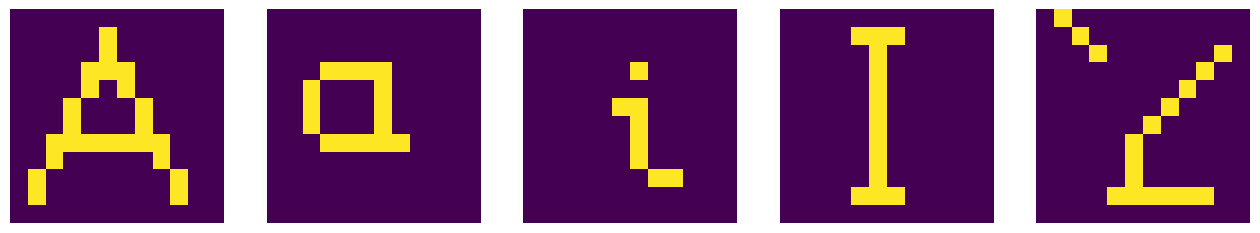

In [6]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(sym[i-1]) # plot symbol, numbered from 0 to 4
    
plt.show()    

```{warning}
W Pythonie zakres range $(i,j)$ zawiera $i$, ale nie obejmuje $j$, tj. równa się tablicy $[i, i+1, \dots, j-1]$. Ponadto range$(i)$ obejmuje $0, 1, \dots, i-1$. Różni się to od konwencji przyjętej w niektórych innych językach programowania.
```

Wygodniej jest pracować nie z powyższymi tablicami dwuwymiarowymi, ale z jednowymiarowymi wektorami uzyskanymi za pomocą tzw. procedury **spłaszczania**, gdzie macierz jest ,,pocięta" wzdłuż swoich wierszy, złożonych w wektor. Na przykład

In [7]:
t=np.array([[1,2,3],[0,4,0],[3,2,7]]) # a matrix
print(t)                            
print(t.flatten())                    # matrix flattened into a vector   

[[1 2 3]
 [0 4 0]
 [3 2 7]]
[1 2 3 0 4 0 3 2 7]


A zatem przeprowadzamy spłaszczenie na naszym zestawie symboli

In [8]:
fA=A.flatten()
fa=a.flatten()
fi=ii.flatten()
fI=I.flatten()
fY=Y.flatten()

aby otrzymać, np.

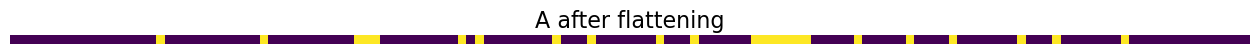

In [9]:
fig = plt.figure(figsize=(16, 4))
plt.axis("off")
plt.title("A after flattening",fontsize=16)
plt.imshow([fA])
plt.show()

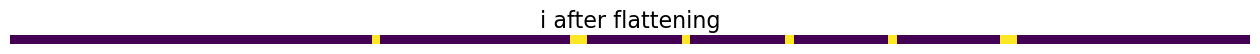

In [10]:
fig = plt.figure(figsize=(16, 4))
plt.axis("off")
plt.title("i after flattening",fontsize=16)
plt.imshow([fi])
plt.show()

Zaletą pracy z wektorami jest to, że możemy użyć wbudowanego iloczynu skalarnego. Zauważmy, że tutaj iloczyn skalarny wektorów odpowiadających dwóm symbolom jest po prostu równy liczbie wspólnych żółtych pikseli. Na przykład dla spłaszczonych symboli A oraz i, narysowanych powyżej, mamy tylko dwa wspólne żółte piksele:

In [11]:
np.dot(fA,fi)

2

Jasne jest, że można użyć iloczynu skalarnego jako miary podobieństwa między symbolami. Aby poniżej pzedstawiony model pamięci skojarzeniowej działał, symbole nie powinny być zbyt podobne, ponieważ mogą być wtedy „mylone”.

### Macierz pamięci

Następna koncepcja algebraiczna, której potrzebujemy, to **iloczyn zewnętrzny**. Dla dwóch wektorów $v$ i $w$ jest on zdefiniowany jako $v w^T = v \otimes w$ (w przeciwieństwie do iloczynu skalarnego, gdzie $w^T v = w \cdot v$). Tutaj $T$ oznacza transpozycję. Wynikiem jest macierz z liczbą wierszy równą długości $v$ i liczbą kolumn równą długości $w$.

Na przykład dla

$$ v = \left ( \begin{array}{c} v_1 \\ v_2 \\v_3 \end{array}  \right ), \;\;\;\; w = \left ( \begin{array}{c} w_1 \\ w_2 \end{array}  \right ), $$

mamy

$$ 
v \otimes w = v w^T=
\left ( \begin{array}{c} v_1 \\ v_2 \\v_3 \end{array}  \right ) (w_1,w_2)
= \left ( \begin{array}{cc} v_1 w_1 & v_1 w_2 \\ v_2 w_1 & v_2 w_2 \\v_3 v_1 & v_3 w_2 \end{array}  \right ).
$$

(przypomnij sobie z algebry, że mnożymy „wiersze przez kolumny”). w **numpy**

In [12]:
print(np.outer([1,2,3],[2,7])) # outer product of two vectors

[[ 2  7]
 [ 4 14]
 [ 6 21]]


Następnie konstruujemy **macierz pamięci** potrzebną do modelowania pamięci heteroasocjacyjnej. Załóżmy najpierw, dla uproszczenia notacji, że mamy tylko dwa skojarzenia: $a \to A$ i $b \to B$. Niech

$$M = A a^T/a\cdot a + B b^T/b\cdot b.$$ 

Wówczas 

$$M a=  A + B \, a\cdot b /b \cdot a, $$ 

i jeśli $a$ and $b$ byłyby **ortogonalne**, tj. $a \cdot b =0$, to

$ M a =  A$, 

dając dokładne skojarzenie. Podobnie otrzymalibyśmy $Mb = B$. Ponieważ jednak w ogólnym przypadku wektory nie są dokładnie ortogonalne, generowany jest pewien błąd $B \, b \cdot a/a \cdot a$ (dla asocjacji $a$). Zwykle jest on mały, jeśli liczba pikseli w naszych symbolach jest duża, a symbole są, ogólnie rzecz biorąc, niezbyt do siebie podobne (nie mają zbyt wielu wspólnych pikseli). Jak wkrótce zobaczymy, pojawiający się błąd można wydajnie „odfiltrować”  odpowiednią funkcją aktywacji neuronów.

Wracając do naszego konkretnego przypadku, potrzebujemy zatem czterech członów w $M$, ponieważ
$a \to A$, $A\to a$, $I \to i$ oraz $i \to I$:

In [13]:
M=(np.outer(fA,fa)/np.dot(fa,fa)+np.outer(fa,fA)/np.dot(fA,fA)
   +np.outer(fi,fI)/np.dot(fI,fI)+np.outer(fI,fi)/np.dot(fi,fi)); # associated pairs

Teraz, jako test jak to działa, dla każdego spłaszczonego symbolu $s$ obliczamy $Ms$. Wynikiem jest wektor, który chcemy przywrócić do postaci tablicy pikseli $12\times 12$. Operacją odwrotną do spłaszczania w Pythonie jest **reshape**. Na przykład

In [14]:
tt=np.array([1,2,3,5]) # test vector
print(tt.reshape(2,2)) # cutting into 2 rows of length 2

[[1 2]
 [3 5]]


Dla naszych wektorów mamy

In [15]:
Ap=np.dot(M,fA).reshape(12,12)
ap=np.dot(M,fa).reshape(12,12)
Ip=np.dot(M,fI).reshape(12,12)
ip=np.dot(M,fi).reshape(12,12)
Yp=np.dot(M,fY).reshape(12,12) # we also try the unassociated symbol Y

symp=[Ap,ap,Ip,ip,Yp]          # array of associated symbols

W przypadku skojarzenia z A (które powinno wynosić a) procedura daje nastepujący wynik (stosujemy tu dla ładniejszego wydruku zaokrąglanie do 2 cyfr dziesiętnych poprzez **np.round**)

In [16]:
print(np.round(Ap,2)) # pixel map for the association of the symbol A

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.85 0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   1.6  1.85 1.89 0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.6  0.25 1.6  0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.6  0.   0.54 1.29 0.6  0.   0.   0.   0.  ]
 [0.   0.   1.   0.6  0.   0.25 1.29 0.6  0.   0.   0.   0.  ]
 [0.   0.   0.6  1.6  1.6  1.85 1.89 1.6  0.6  0.   0.   0.  ]
 [0.   0.   0.6  0.   0.   0.25 0.29 0.   0.6  0.   0.   0.  ]
 [0.   0.6  0.   0.   0.   0.25 0.   0.29 0.29 0.6  0.   0.  ]
 [0.   0.6  0.   0.   0.25 0.25 0.25 0.   0.   0.6  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


Zauważamy, że intensywność pikseli niekoniecznie jest teraz równa 0 lub 1, tak jak w oryginalnych symbolach. Przedstawienie graficzne wygląda następująco:

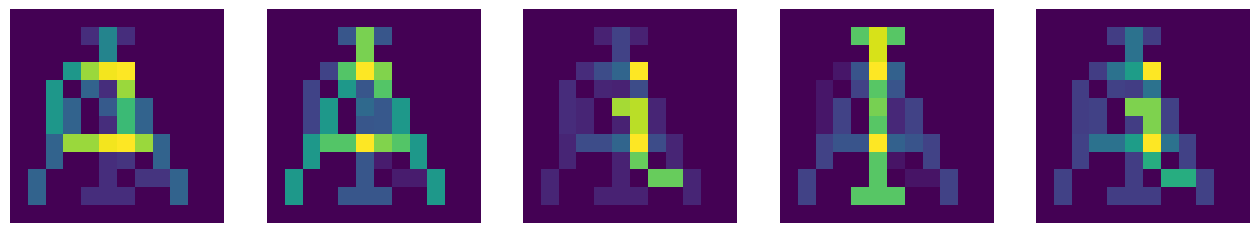

In [17]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):      # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i)  # panels, numbered from 1 to 5
    plt.axis('off')       # no axes
    plt.imshow(symp[i-1]) # plot symbol, numbered from 0 to 4
    
plt.show()

Powinniśmy być w stanie zobaczyć na powyższym obrazku sekwencję a, A, i, I oraz nic szczególnego w powiązaniu z Y. Prawie tak jest, ale sytuacja nie jest idealna ze względu na omówiony powyżej błąd wynikający z nieortogonalności.

### Nakładanie filtra

Wynik znacznie się poprawi, gdy do powyższych map pikseli zostanie zastosowany filtr. Patrząc na powyższy rysunek zauważamy, że powinniśmy pozbyć się „słabych cieni”, a pozostawić tylko piksele o wystarczającej sile, które następnie powinny otrzymac warość 1. Innymi słowy, piksele poniżej progu filtra $b$ powinny zostać zresetowane do 0, a te powyżej lub równe $b$ powinny zostać zresetowane do 1. Można to zgrabnie osiągnąć za pomocą naszego **neuronu** z rozdz. {ref}`mcp_P-lab`. Funkcja ta została umieszczona w bibliotece **neural** (patrz [Dodatek](app-lab)).

A zatem definiujemy filtry jako neurony MCP o wagach $w_0=-b$ i $w_1=1$:

In [31]:
def filter(a,b): # a - symbol (2-dim pixel array), b - bias
    n=len(a)     # number of rows (and columns)
    return np.array([[func.neuron([a[i,j]],[-b,1]) for j in range(n)] for i in range(n)])
       # 2-dim array with the filter applied

In [32]:
def filter1(a,b): # a - symbol (1-dim pixel array), b - bias
    n=len(a)      # length of a
    return np.array([func.neuron([a[i]],[-b,1]) for i in range(n)])
       # 1-dim array with the filter applied

Działając na symbol Ap z odpowiednio dobranym $b=0.9$ (przyjęty poziom progu jest tutaj bardzo istotny), uzyskujemy

In [33]:
print(filter(Ap,.9))

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


gdzie możemy zauważyć „czysty” symbol a. Sprawdzamy, czy faktycznie filtrowanie działa tak doskonale we wszystkich naszych skojarzeniach:

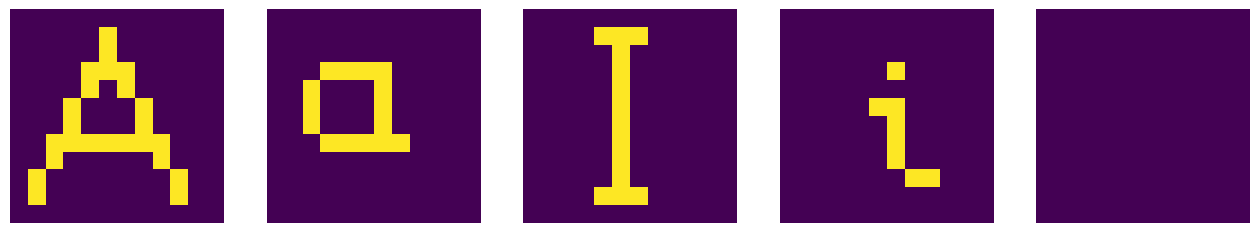

In [34]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(filter(symp[i-1],0.9)) # plot symbol, numbered from 0 to 4
    
plt.show()

Można łatwo podać reprezentację właśnie przedstawionego modelu pamięci heteroasocjacyjnej jako **jednowarstwową** sieć neuronów MCP. Na poniższym wykresie ukazujemy wszystkie operacje, idąc od lewej strony do prawej. Symbol wejściowy jest spłaszczony. Warstwy wejściowa i wyjściowa są w pełni połączone krawędziami (których nie pokazano) łączącymi komórki wejściowe z neuronami w warstwie wyjściowej. Wagi krawędzi są równe elementom macierzy $M_{ij}$, oznaczonej symbolem M. Funkcja aktywacji jest taka sama dla wszystkich neuronów i ma postać funkcji schodkowej.

Na dole rysunku wskazujemy elementy wektora wejściowego $x_i$, sygnału docierającego do neuronu $j$, tj. $s_j=\sum_i x_i M_{ij}$ oraz wynik końcowy $y_j=f(s_j)$.

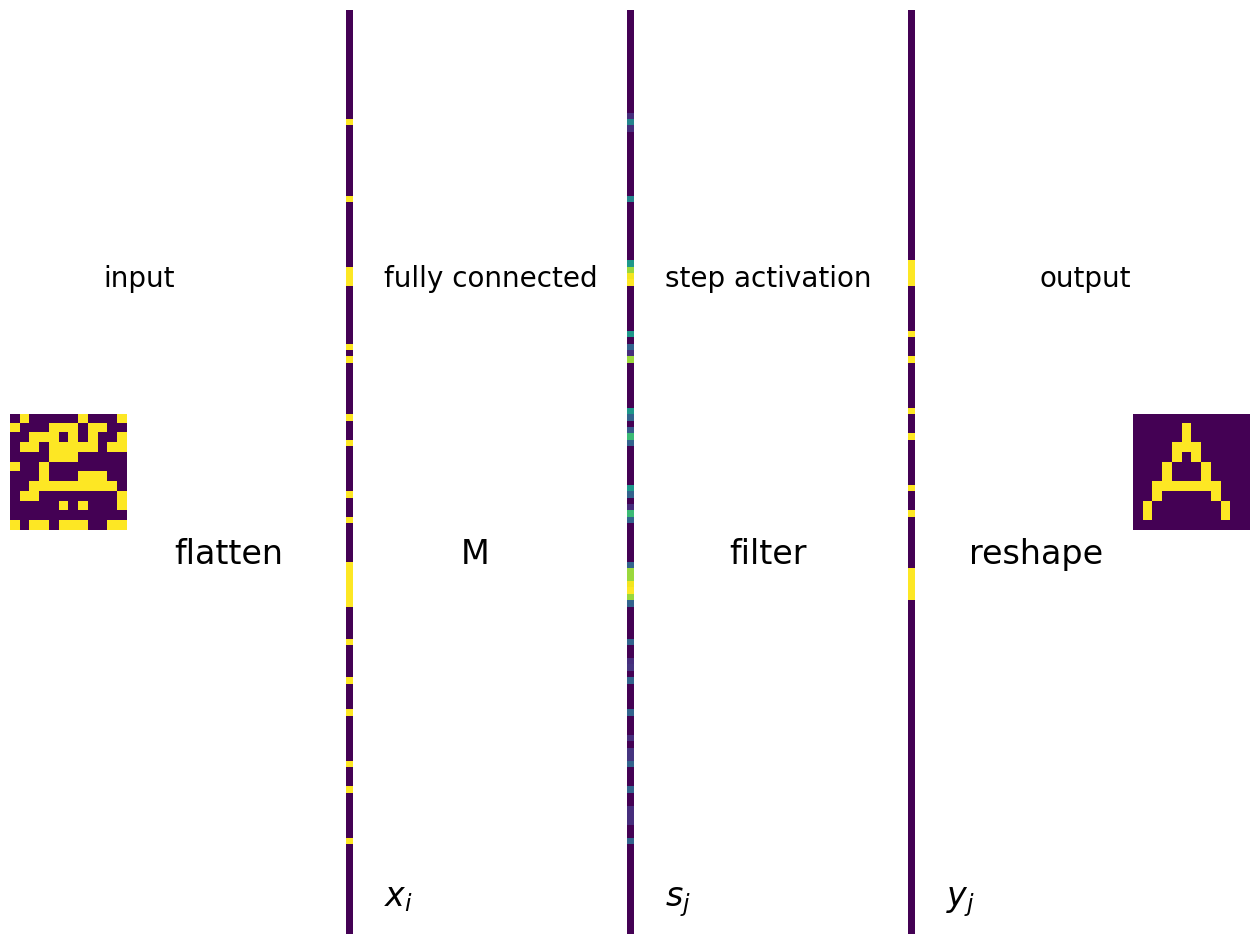

In [35]:
plt.figure(figsize=(16, 12)) 

plt.subplot(1, 9, 1)
plt.axis('off') 
plt.imshow(A);

plt.subplot(1, 9, 2) 
plt.axis('off') 
plt.text(0.2,0.4,'flatten',fontsize=24)
plt.text(-.4,0.7,'input',fontsize=20);

plt.subplot(1, 9, 3) 
plt.axis('off') 
plt.imshow(np.transpose([fA]))

plt.subplot(1, 9, 4) 
plt.axis('off') 
plt.text(0.25,0.4,'M',fontsize=24)
plt.text(-0.4,0.7,'fully connected',fontsize=20)
plt.text(-0.4,0.03,'$x_i$',fontsize=24);

fAp=np.dot(M,fA)

plt.subplot(1, 9, 5) 
plt.axis('off') 
plt.imshow(np.transpose([fAp]));

plt.subplot(1, 9, 6) 
plt.axis('off') 
plt.text(0.15,0.4,'filter',fontsize=24)
plt.text(-0.4,0.7,'step activation',fontsize=20)
plt.text(-0.4,0.03,'$s_j$',fontsize=24);

plt.subplot(1, 9, 7) 
plt.axis('off') 
plt.imshow(np.transpose([filter1(fAp,.9)]));

plt.subplot(1, 9, 8)
plt.axis('off') 
plt.text(-.20,0.4,'reshape',fontsize=24)
plt.text(.4,0.7,'output',fontsize=20)
plt.text(-0.4,0.03,'$y_j$',fontsize=24);

plt.subplot(1, 9, 9)
plt.axis('off') 
plt.imshow(filter(Ap,.9));

plt.show()


```{admonition} Podsumowanie modelu pamieci heteroassociatywnej
:class: note

0. Zdefiniuj pary skojarzonych symboli i skonstruuj macierz pamięci $M$.

1. Wejście to symbol w postaci 2-wymiarowej tablicy pikseli o wartościach 0 lub 1.

2. Spłaszcz symbol do wektora, który tworzy warstwę danych wejściowych $x_i$.

3. Macierz wag w pełni połączonej sieci ANN to $M$.

4. Sygnał wchodzący do neuronu $j$ w warstwie wyjściowej to $s_j=\sum_i x_i M_{ij}$.

5. Funkcja aktywacji to funkcja schodkowa z odpowiednio dobranym progiem. Daje ona $y_j=f(s_j)$.

6. Potnij wektor wyjściowy na macierz pikseli, która stanowi ostateczny wynik.
Powinien to być symbol skojarzony z symbolem na wejściu.
```

## Pamieć autoasocjatywna

### Samo-skojarzenia

Model pamięci autoasocjacyjnej jest w bliskiej analogii do przypadku pamięci skojarzeniowej, ale teraz każdy symbol jest kojarzony **z samym sobą**. Dlaczego robimy coś takiego, stanie się jasne, gdy weźmiemy pod uwagę zniekształcone dane wejściowe. Definiujemy macierz asocjacji w następujący sposób:

In [36]:
Ma=(np.outer(fA,fA)/np.dot(fA,fA)+np.outer(fa,fa)/np.dot(fa,fa)
    +np.outer(fi,fi)/np.dot(fi,fi)+np.outer(fI,fI)/np.dot(fI,fI))

In [37]:
Ap=np.dot(Ma,fA).reshape(12,12)
ap=np.dot(Ma,fa).reshape(12,12)
Ip=np.dot(Ma,fI).reshape(12,12)
ip=np.dot(Ma,fi).reshape(12,12)
Yp=np.dot(Ma,fY).reshape(12,12)

symp=[Ap,ap,Ip,ip,Yp] # array of self-associated symbols

Po przemnożeniu spłaszczonego symbolu przez macierz Ma i przefiltrowaniu (wszystkie kroki jak w przypadku skojarzeniowym) otrzymujemy poprawnie oryginalne symbole (poza Y, który nie był z niczym powiązany).

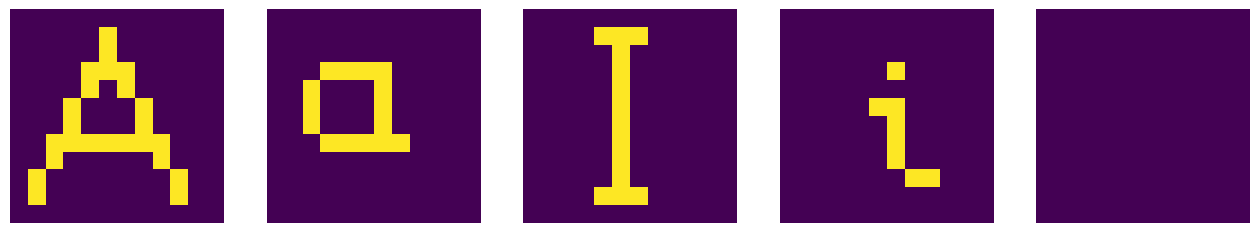

In [38]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(filter(symp[i-1],0.9)) # plot symbol, numbered from 0 to 4
    
plt.show()

### Zniekształcone symbole

Teraz wyobraź sobie, że oryginalny symbol zostaje częściowo zniszczony, a niektóre piksele są losowo zmieniane z 1 na 0 i odwrotnie.

In [39]:
ne=62   # number of alterations

for s in sym:                     # loop over symbols
    for _ in range(ne):           # loop over alteratons
        i=np.random.randint(0,12) # random position in row
        j=np.random.randint(0,12) # random position in column
        s[i,j]=1-s[i,j]           # trick to switch 1 and 0

Po tym zniszczeniu symbole wejściowe wyglądają tak:

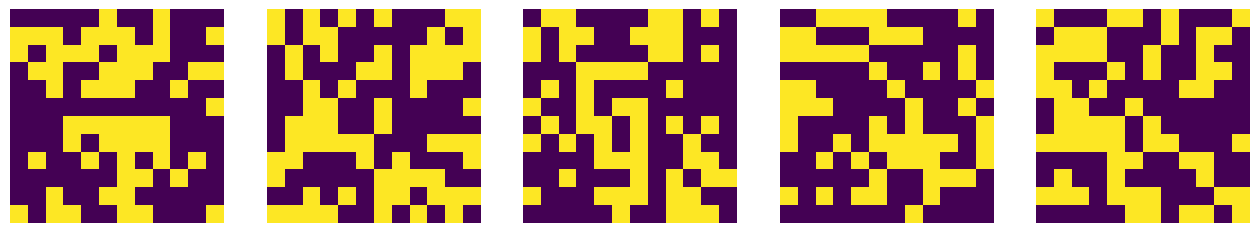

In [40]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(sym[i-1]) # plot symbol, numbered from 0 to 4
    
plt.show()

### Odtworzenie symboli

Następnie stosujemy nasz model pamięci autoasocjacyjnej do wszystkich „zniszczonych” symboli:

In [41]:
Ap=np.dot(Ma,fA).reshape(12,12)
ap=np.dot(Ma,fa).reshape(12,12)
Ip=np.dot(Ma,fI).reshape(12,12)
ip=np.dot(Ma,fi).reshape(12,12)
Yp=np.dot(Ma,fY).reshape(12,12)

symp=[Ap,ap,Ip,ip,Yp] 

co daje

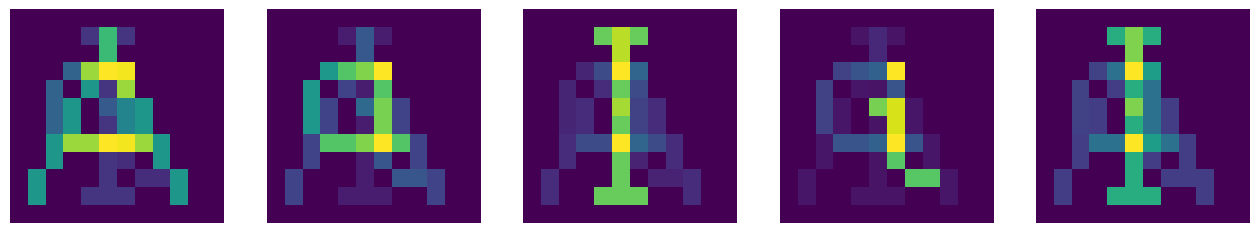

In [42]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):      # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i)  # panels, numbered from 1 to 5
    plt.axis('off')       # no axes
    plt.imshow(symp[i-1]) # plot symbol, numbered from 0 to 4
    
plt.show()

Po przefiltrowaniu z progiem $b=0.9$ odzyskujemy originale symbole:

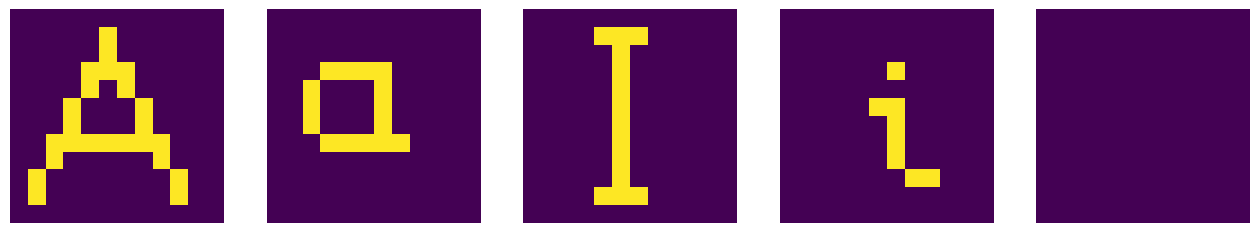

In [43]:
plt.figure(figsize=(16, 6))

for i in range(1,6):     
    plt.subplot(1, 5, i)  
    plt.axis('off')       
    plt.imshow(filter(symp[i-1],0.9)) # plot filtered symbol
    
plt.show()

Zastosowanie algorytmu może zatem odszyfrować „zniszczony” tekst lub, bardziej ogólnie, zapewnić mechanizm korekcji błędów.

```{admonition} Podsumowanie modelu pamieci autoasocjatywnej
:class: note

0. Skonstruuj macierz pamięci $Ma$.

1. Wejście to symbol w postaci 2-wymiarowej tablicy pikseli o wartościach 0 lub 1, gdzie
pewna liczba pikseli jest losowo przekłamana.

2. Spłaszcz symbol do wektora, który tworzy warstwę danych wejściowych $x_i$.

3. Macierz wag w pełni połączonej sieci ANN to $Ma$.

4. Sygnał wchodzący do neuronu $j$ w warstwie wyjściowej to $s_j=\sum_i x_i M_{ij}$.

5. Funkcja aktywacji to funkcja schodkowa z odpowiednio dobranym progiem. Daje ona $y_j=f(s_j)$.

6. Potnij wektor wyjściowy na macierz pikseli, która stanowi ostateczny wynik. Powinien zostać przywrócony oryginalny symbol.
```

```{important}
Konkluzja: ANN z jedną warstwą neuronów MPC mogą służyć jako bardzo proste modele pamięci!
```

Zauważmy jednak, że skonstruowaliśmy macierze pamięciowe algebraicznie, niejako zewnętrznie. Dlatego sieć tak naprawdę nie nauczyła się skojarzeń z doświadczenia. Są na to sposoby, ale wymagają one bardziej zaawansowanych metod (patrz np. {cite}```freeman1991```), podobne do omówionych w kolejnych częściach tego wykładu.

```{note}
Implementacja omawianych modeli pamięci w programie Mathematica znajduje się w
{cite}`freeman1993` ([https://library.wolfram.com/infocenter/Books/3485](https://library.wolfram.com/infocenter/Books/3485)) oraz we wspomnianych już wykładach [Daniel Kersten](http://vision.psych.umn.edu/users/kersten/kersten-lab/courses/Psy5038WF2014/IntroNeuralSyllabus.html).
```

## Ćwiczenia

```{admonition} $~$
:class: warning

Pobaw się kodem z wykładu i

- dodawaj coraz więcej symboli;
- zmieniaj poziom filtra;
- zwiększ liczbę przekłamań.

Omów swoje spostrzeżenia i przedyskutuj ograniczenia modeli.

```
